In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel("Cleaned-donors-data.xlsx")

In [4]:
df.head()

,Donation Date (UTC),Time (UTC),Intended Donation,Amount Charged,Bank Fees,Processing Fees,Donor Covered Fees?,Payout Amount,Payout Date (UTC),First Name,...,Fundraiser,Comment,Donation Type,Referral Source,Referral Medium,Referral Campaign,In Memory/Honor of,Honoree Name,Honoree Email,Honoree Message
0,2020-06-12 00:00:00,NaN,100.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,...,Mary Wilke,NaN,Check 894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-09 00:00:00,NaN,103.0,NaN,NaN,NaN,NaN,103.0,NaN,Richard,...,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-09 00:00:00,NaN,51.5,NaN,NaN,NaN,NaN,51.5,NaN,Miriam,...,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-09 00:00:00,NaN,103.0,NaN,NaN,NaN,NaN,103.0,NaN,Claudia,...,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-10 00:00:00,NaN,1000.0,NaN,NaN,NaN,NaN,1000.0,NaN,David,...,Jen Boylston,NaN,Check 1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df)

340

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Donation Date (UTC)  340 non-null    object 
 1   Time (UTC)           315 non-null    object 
 2   Intended Donation    340 non-null    float64
 3   Amount Charged       315 non-null    float64
 4   Bank Fees            238 non-null    float64
 5   Processing Fees      238 non-null    float64
 6   Donor Covered Fees?  315 non-null    object 
 7   Payout Amount        340 non-null    float64
 8   Payout Date (UTC)    238 non-null    object 
 9   First Name           339 non-null    object 
 10  Last Name            260 non-null    object 
 11  Display Name         148 non-null    object 
 12  Email                251 non-null    object 
 13  Address              255 non-null    object 
 14  City                 263 non-null    object 
 15  State                263 non-null    obj

# Exploratory Data Analysis

In [7]:
df.describe()

,Intended Donation,Amount Charged,Bank Fees,Processing Fees,Payout Amount
count,340.000000,315.000000,238.000000,238.000000,340.000000
mean,85.129559,81.769143,2.267731,3.160756,83.998088
std,114.015918,95.490075,2.369535,3.294813,113.663029
min,10.000000,10.000000,0.520000,0.350000,8.980000
25%,25.000000,27.150000,0.970000,1.250000,25.000000
50%,50.000000,53.380000,1.630000,1.750000,50.000000
75%,100.000000,100.000000,2.670000,3.500000,100.000000
max,1000.000000,1043.250000,23.250000,20.000000,1000.000000


In [8]:
#convert categorical data to numeric data
#df['New Donor?'] = df['New Donor?'].map({'Yes':1,'No':0})

In [9]:
#df['Donor Covered Fees?'] = df['Donor Covered Fees?'].map({'Yes':1,'No':0})

In [10]:
#df['Recurring?'] = df['Recurring?'].map({'Yes':1,'No':0})

In [11]:
#df['Anonymous?'] = df['Anonymous?'].map({'Yes':1,'No':0})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Donation Date (UTC)  340 non-null    object 
 1   Time (UTC)           315 non-null    object 
 2   Intended Donation    340 non-null    float64
 3   Amount Charged       315 non-null    float64
 4   Bank Fees            238 non-null    float64
 5   Processing Fees      238 non-null    float64
 6   Donor Covered Fees?  315 non-null    object 
 7   Payout Amount        340 non-null    float64
 8   Payout Date (UTC)    238 non-null    object 
 9   First Name           339 non-null    object 
 10  Last Name            260 non-null    object 
 11  Display Name         148 non-null    object 
 12  Email                251 non-null    object 
 13  Address              255 non-null    object 
 14  City                 263 non-null    object 
 15  State                263 non-null    obj

In [13]:
df.isnull().sum()

Donation Date (UTC)      0
Time (UTC)              25
Intended Donation        0
Amount Charged          25
Bank Fees              102
Processing Fees        102
Donor Covered Fees?     25
Payout Amount            0
Payout Date (UTC)      102
First Name               1
Last Name               80
Display Name           192
Email                   89
Address                 85
City                    77
State                   77
Zipcode                 77
Country                 78
Phone                  127
Anonymous?               0
New Donor?              77
Recurring?              25
Campaign                 0
Giving Day              25
Fundraiser             212
Comment                330
Donation Type            0
Referral Source        270
Referral Medium        270
Referral Campaign      338
In Memory/Honor of     327
Honoree Name           327
Honoree Email          338
Honoree Message        339
dtype: int64

<AxesSubplot:>

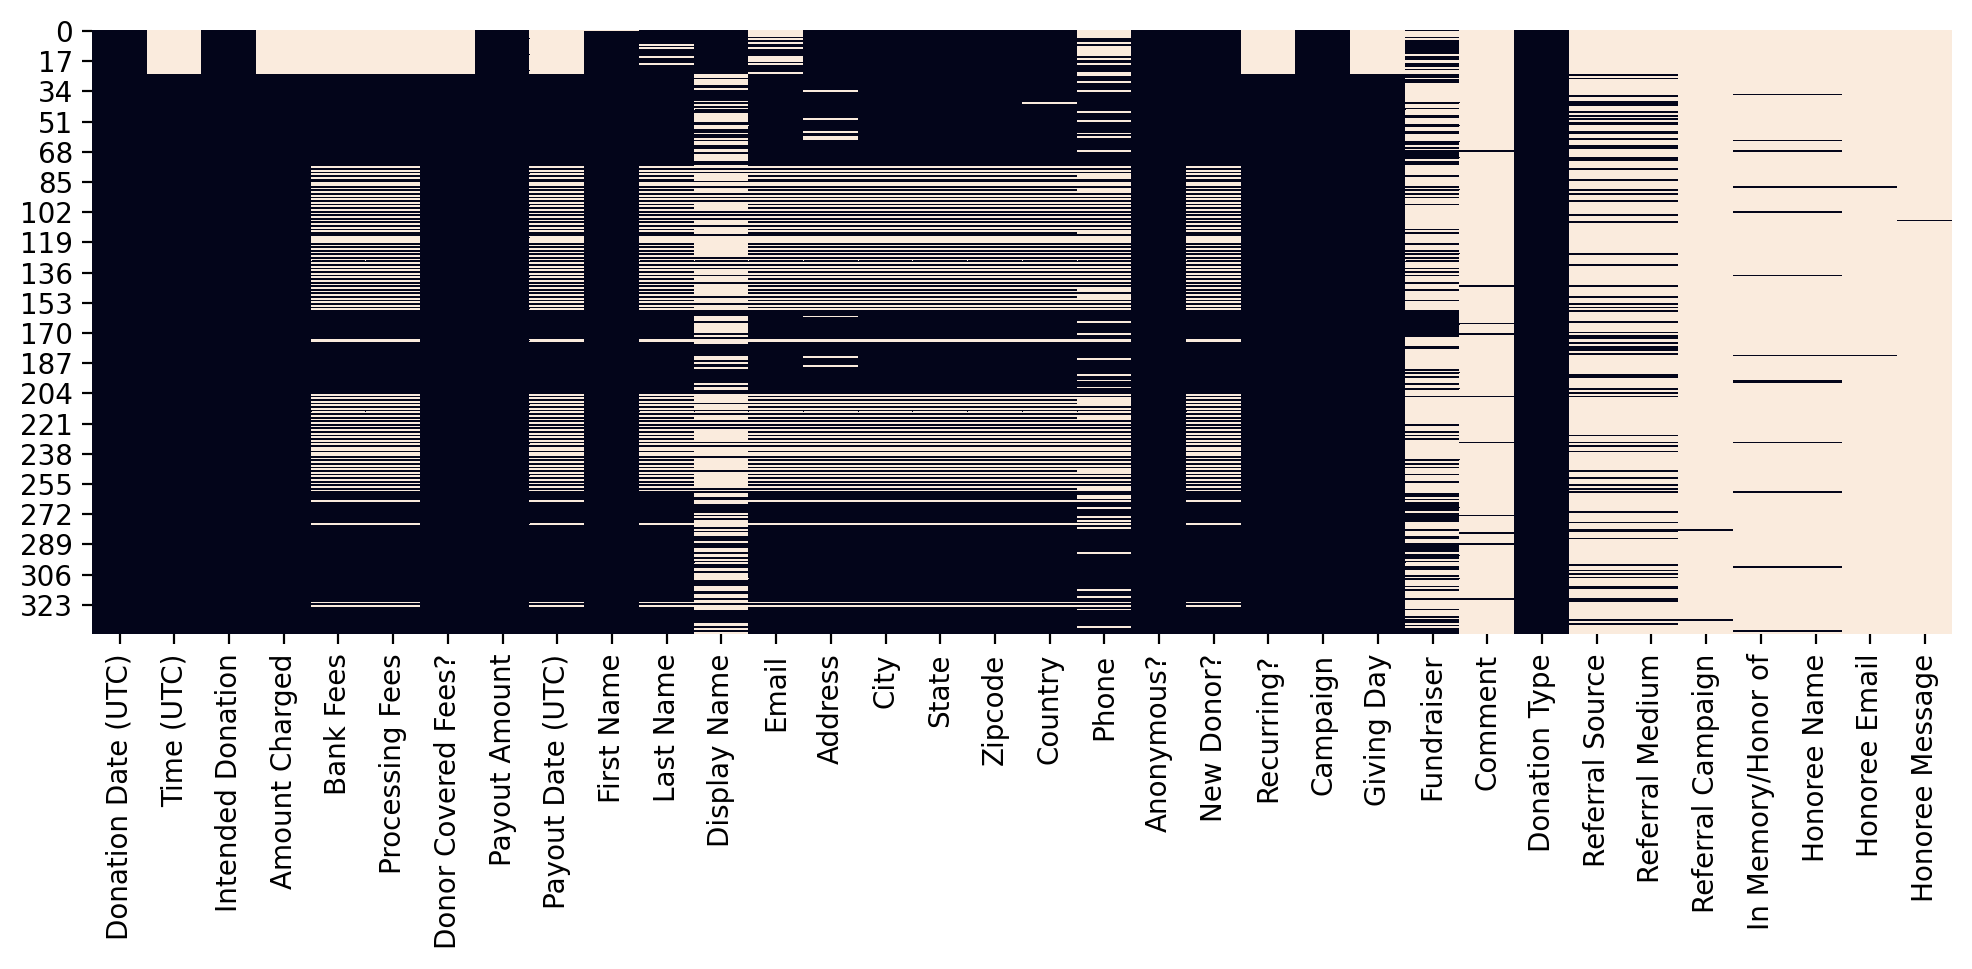

In [14]:
#Heatmap to check missing values
plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(df.isnull(), cbar=False)

In [15]:
df1 = df.drop(['Payout Date (UTC)','Time (UTC)','Honoree Message','Honoree Email','Honoree Name','In Memory/Honor of','Referral Campaign','Comment'],axis=1)

In [16]:
df1.head()

,Donation Date (UTC),Intended Donation,Amount Charged,Bank Fees,Processing Fees,Donor Covered Fees?,Payout Amount,First Name,Last Name,Display Name,...,Phone,Anonymous?,New Donor?,Recurring?,Campaign,Giving Day,Fundraiser,Donation Type,Referral Source,Referral Medium
0,2020-06-12 00:00:00,100.0,NaN,NaN,NaN,NaN,100.0,NaN,Salatiello,Linda and Thomas,...,NaN,No,Yes,NaN,NHGives 2020,NaN,Mary Wilke,Check 894,NaN,NaN
1,2020-12-09 00:00:00,103.0,NaN,NaN,NaN,NaN,103.0,Richard,Guy,Mr. Richard Guy,...,NaN,No,Yes,NaN,2020 Annual Solicitation - email,NaN,NaN,Online,NaN,NaN
2,2020-12-09 00:00:00,51.5,NaN,NaN,NaN,NaN,51.5,Miriam,Cahill-Yeaton,Ms. Miriam Cahill-Yeaton,...,NaN,No,Yes,NaN,2020 Annual Solicitation - email,NaN,NaN,Online,NaN,NaN
3,2020-12-09 00:00:00,103.0,NaN,NaN,NaN,NaN,103.0,Claudia,Damon,Ms. Claudia C. Damon,...,NaN,No,Yes,NaN,2020 Annual Solicitation - email,NaN,NaN,Online,NaN,NaN
4,2020-12-10 00:00:00,1000.0,NaN,NaN,NaN,NaN,1000.0,David,Roby,Mr. David Roby,...,NaN,No,Yes,NaN,2020 Annual Solicitation - mail,NaN,Jen Boylston,Check 1932,NaN,NaN


<AxesSubplot:>

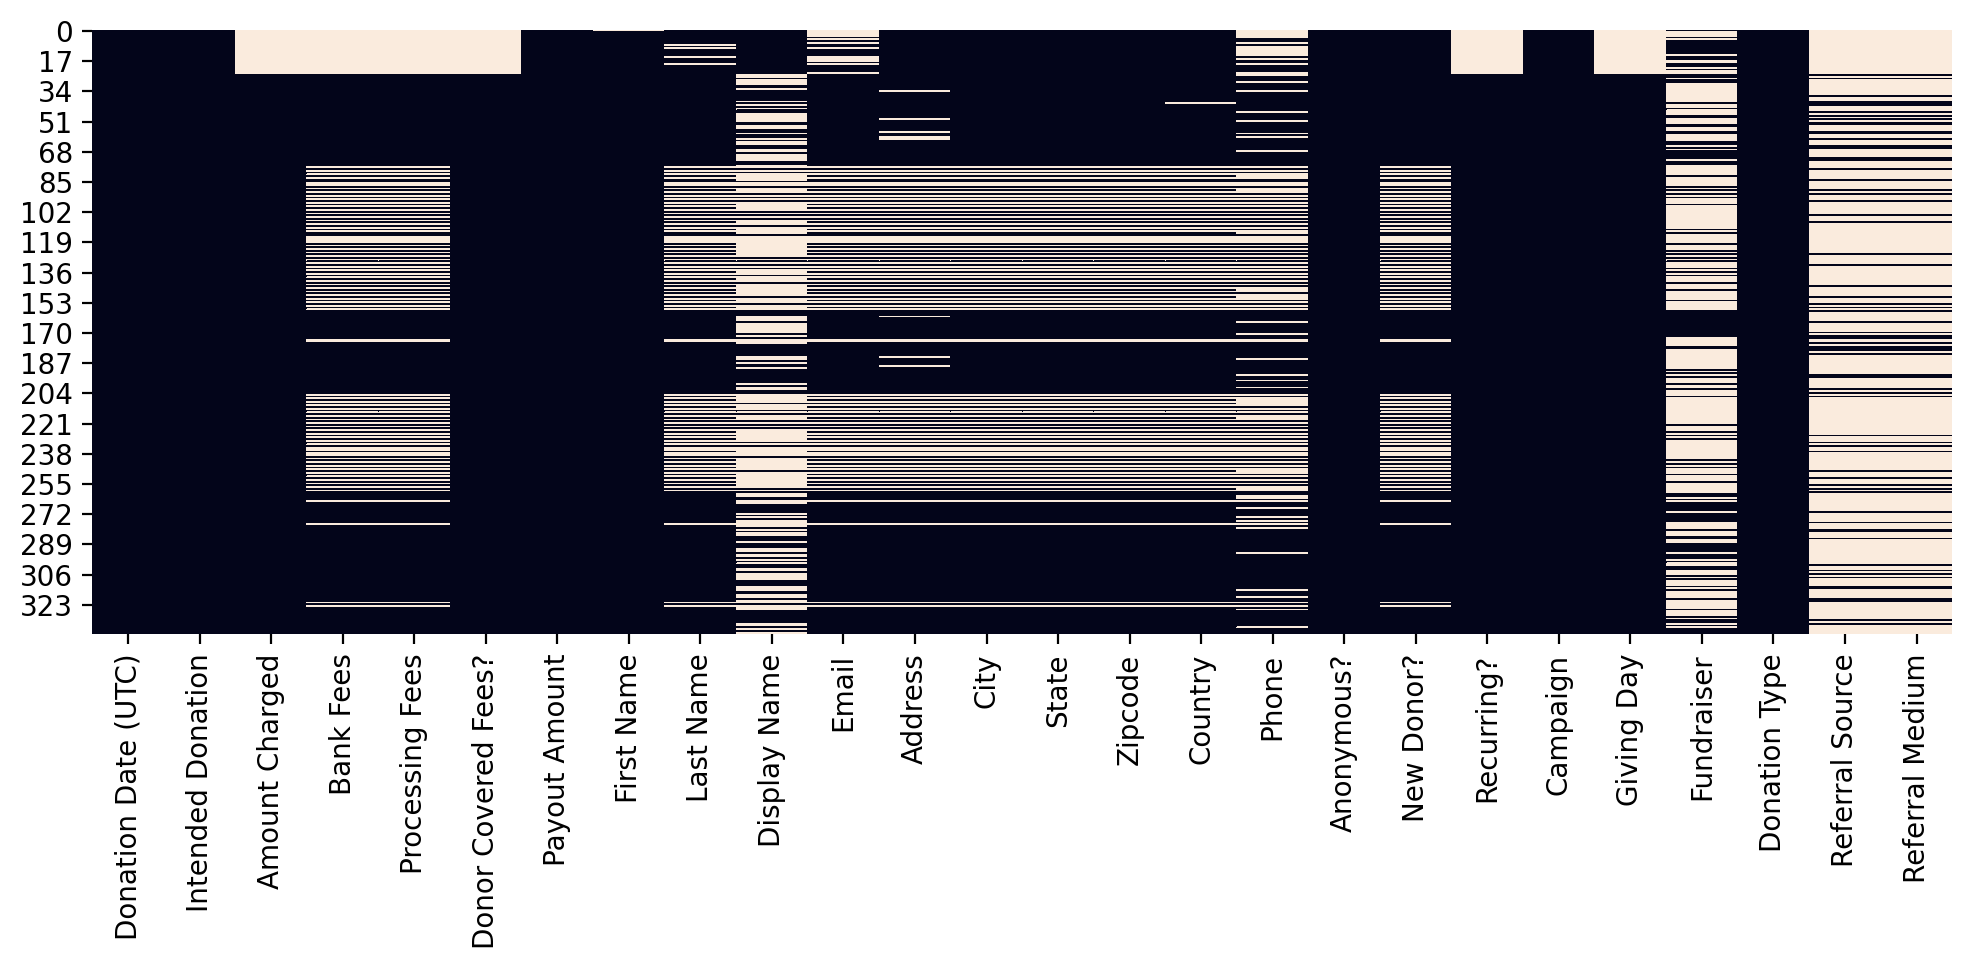

In [17]:
plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(df1.isnull(), cbar=False)

Text(0, 0.5, 'Count')

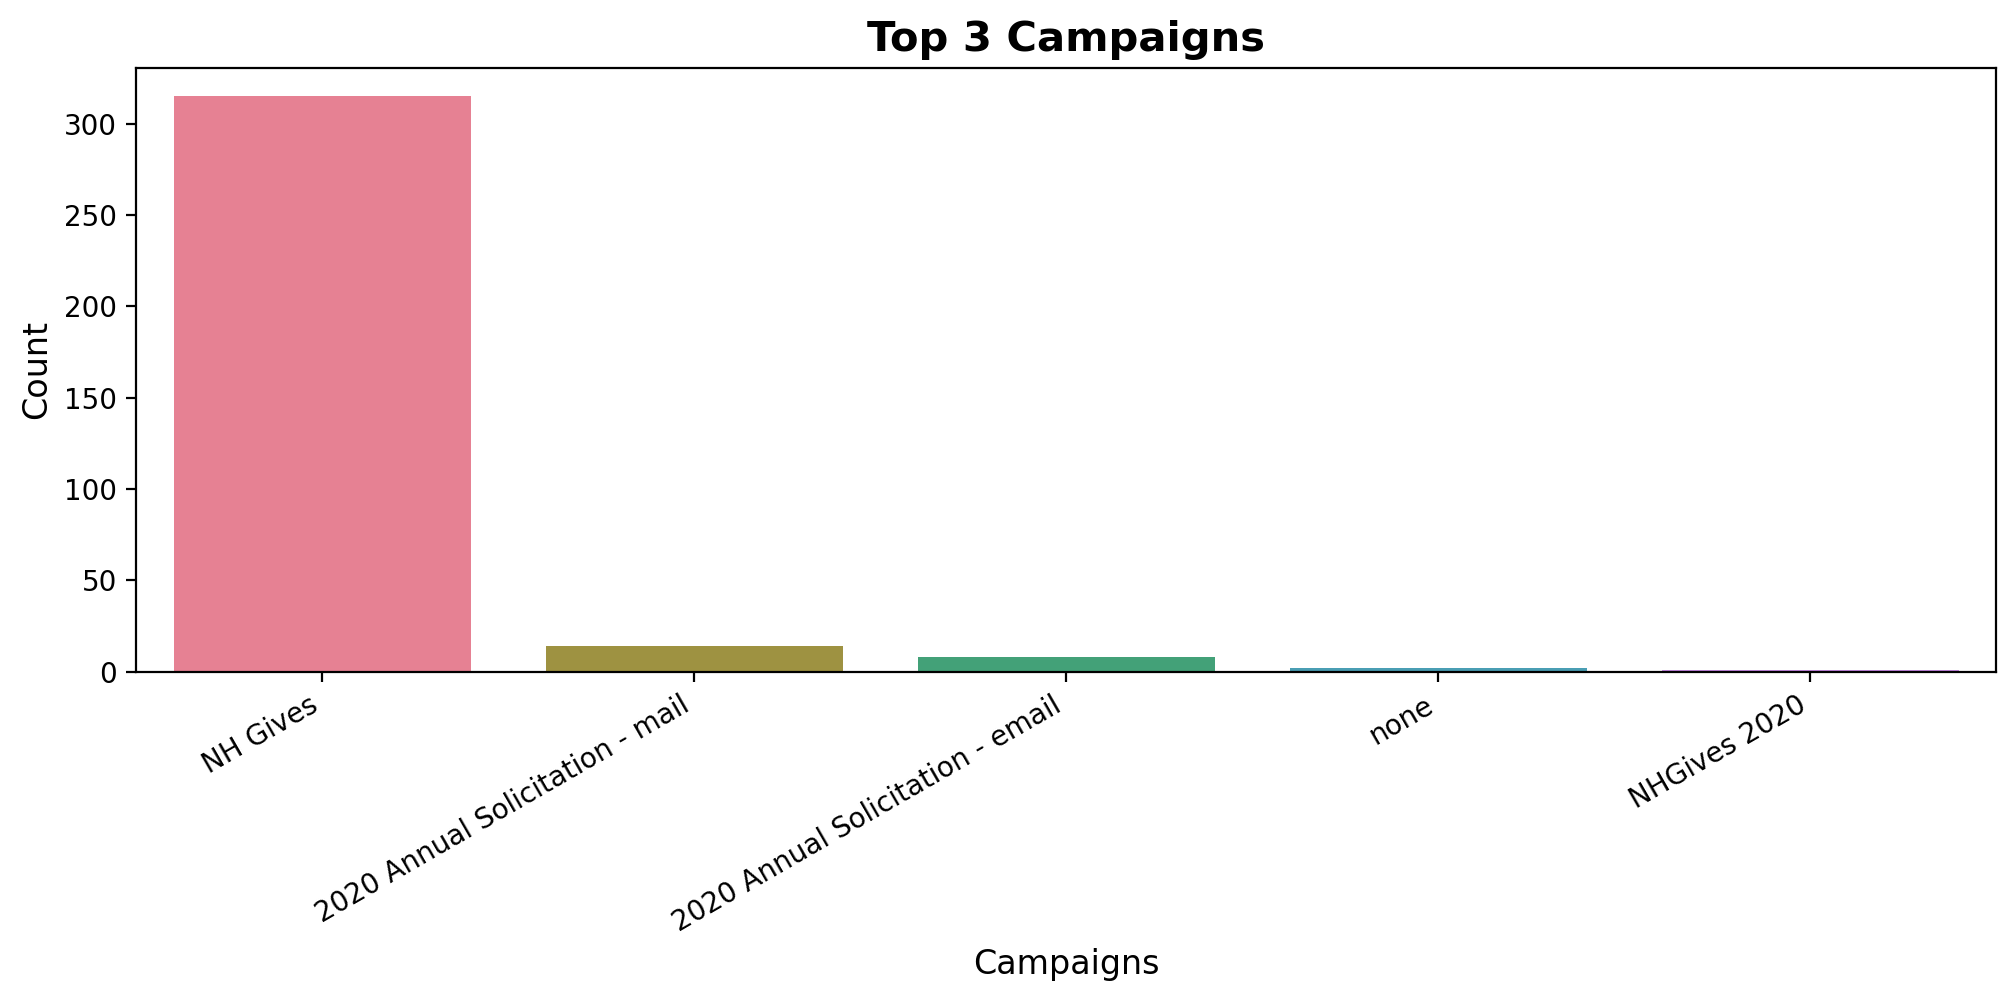

In [19]:
plt.figure(figsize=(12,4), dpi=200)
sns.countplot(x='Campaign', data = df,order= pd.value_counts(df['Campaign']).iloc[:5].index, palette='husl')
plt.title('Top 3 Campaigns', weight='bold', fontsize=15)
plt.xticks(rotation = 30, ha = 'right')
plt.xlabel('Campaigns', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

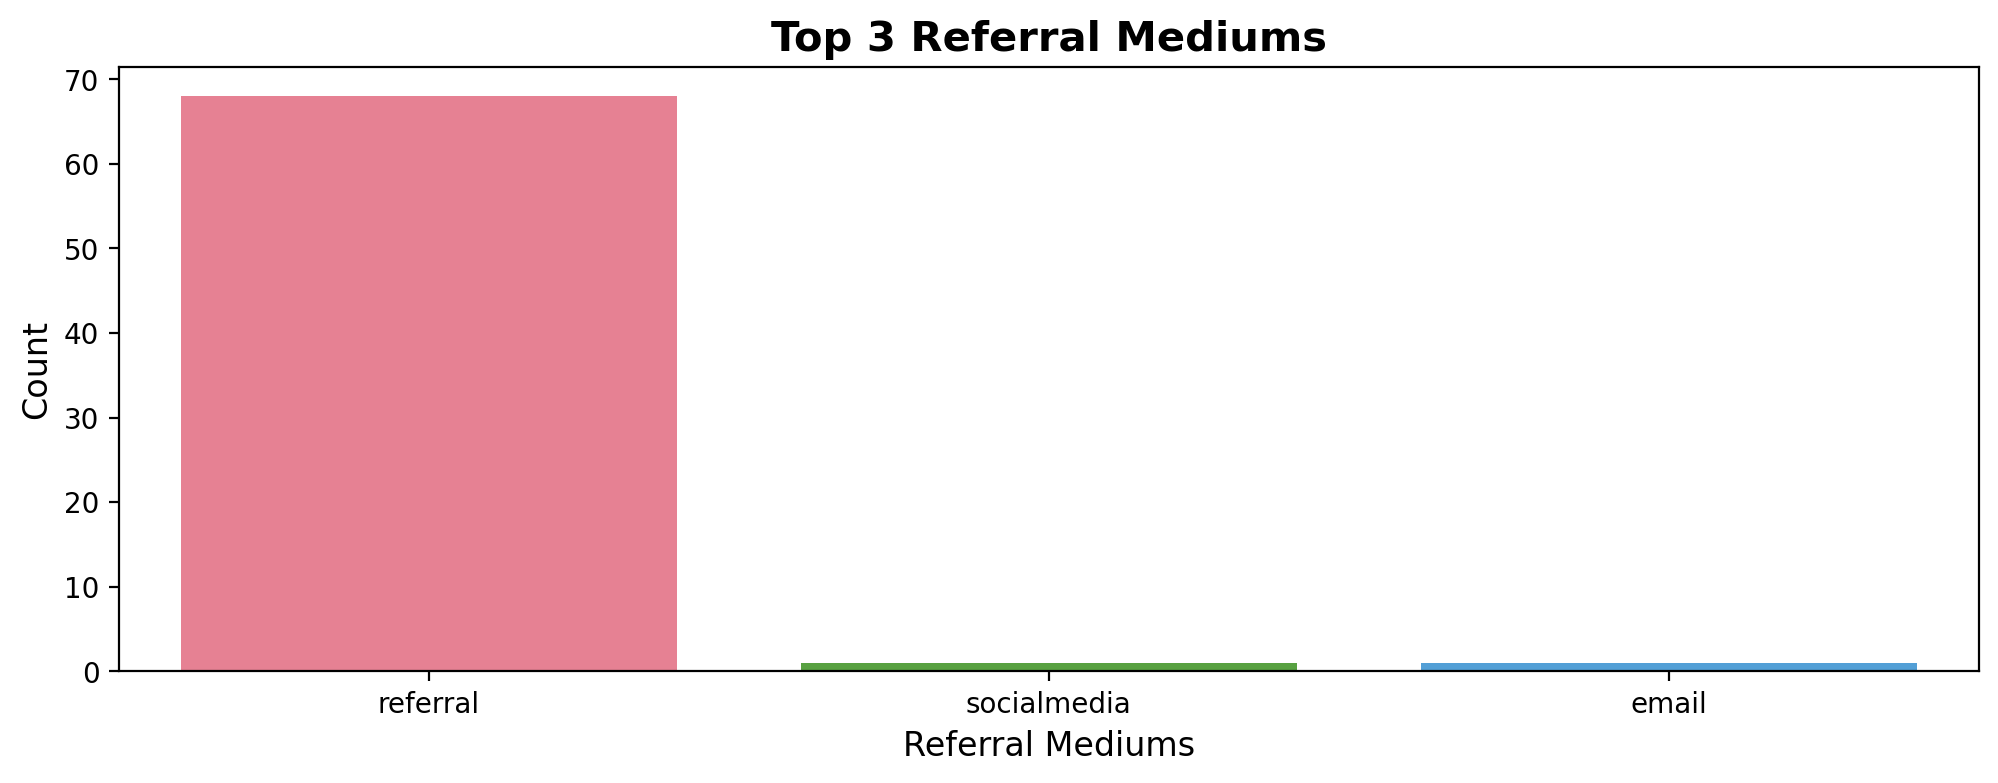

In [20]:
plt.figure(figsize=(12,4), dpi=200)
sns.countplot(x='Referral Medium', data = df, palette='husl')
plt.title('Top 3 Referral Mediums', weight='bold', fontsize=15)
plt.xlabel('Referral Mediums', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

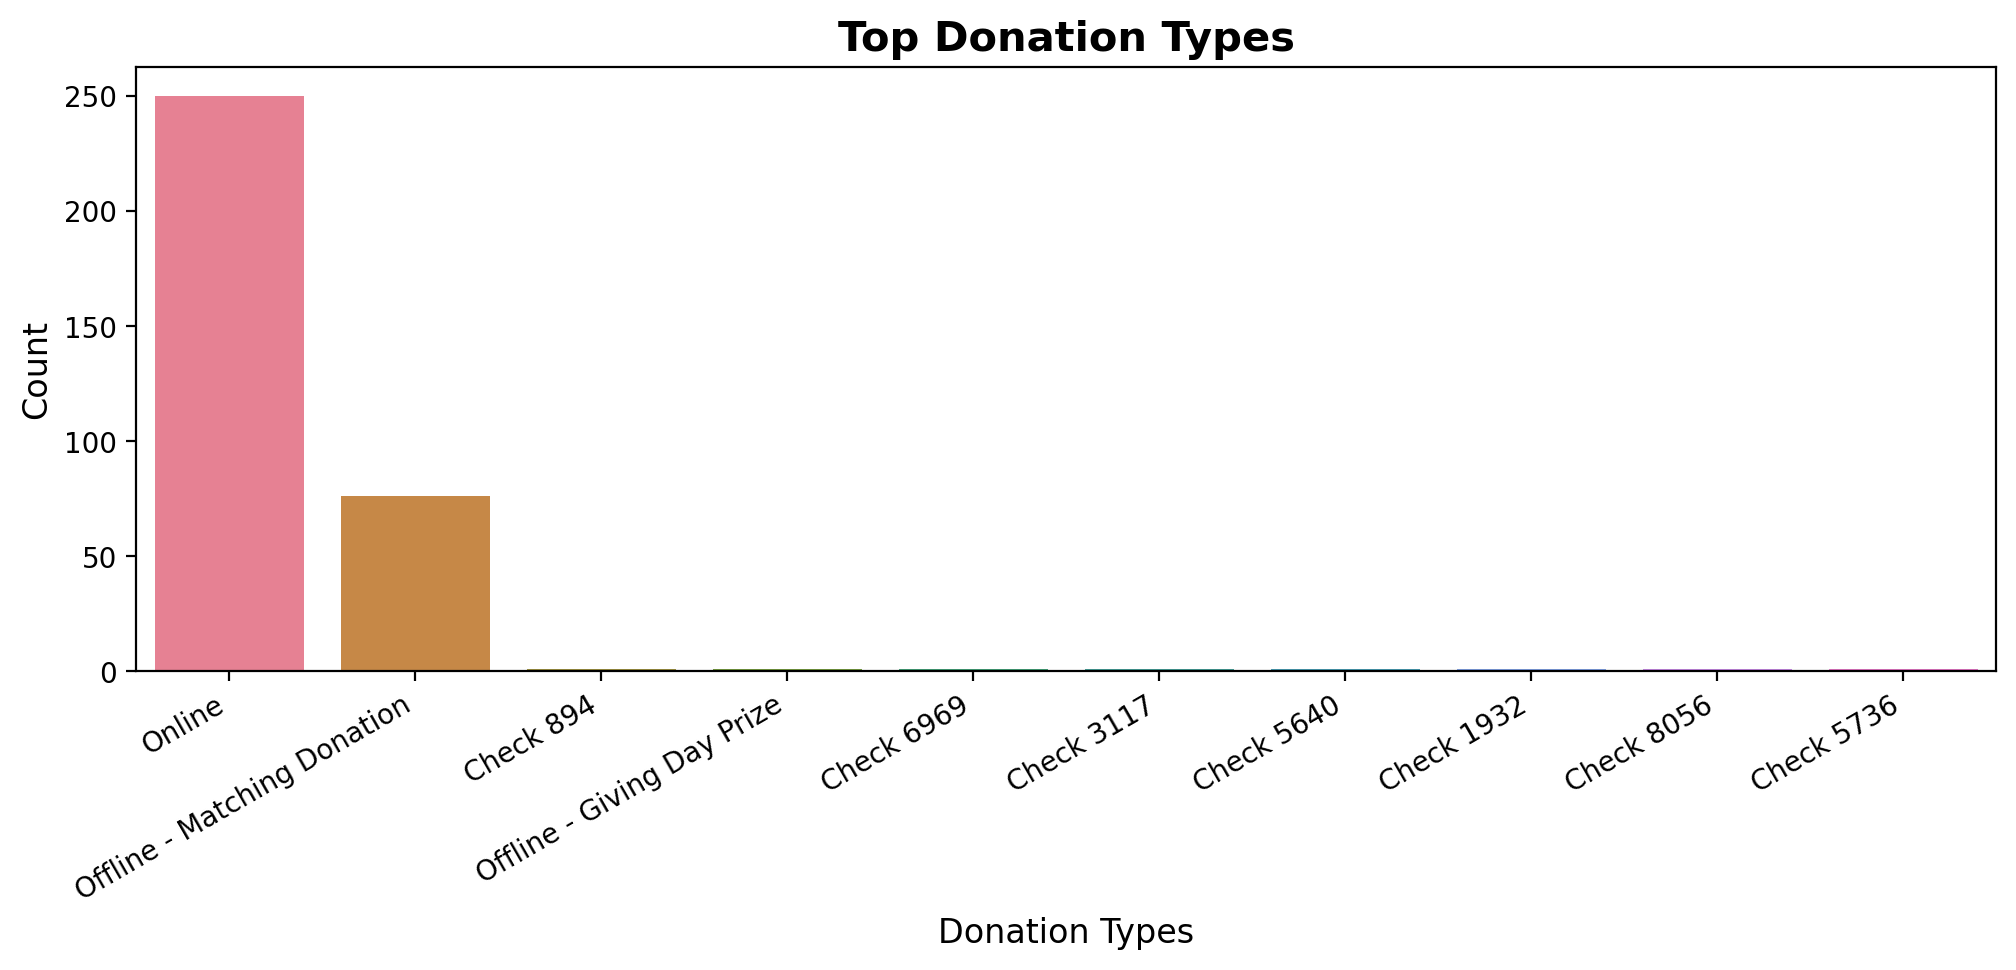

In [21]:
plt.figure(figsize=(12,4), dpi=200)
sns.countplot(x='Donation Type', data = df,order= pd.value_counts(df['Donation Type']).iloc[:10].index, palette='husl')
plt.title('Top Donation Types', weight='bold', fontsize=15)
plt.xticks(rotation = 30, ha = 'right')
plt.xlabel('Donation Types', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

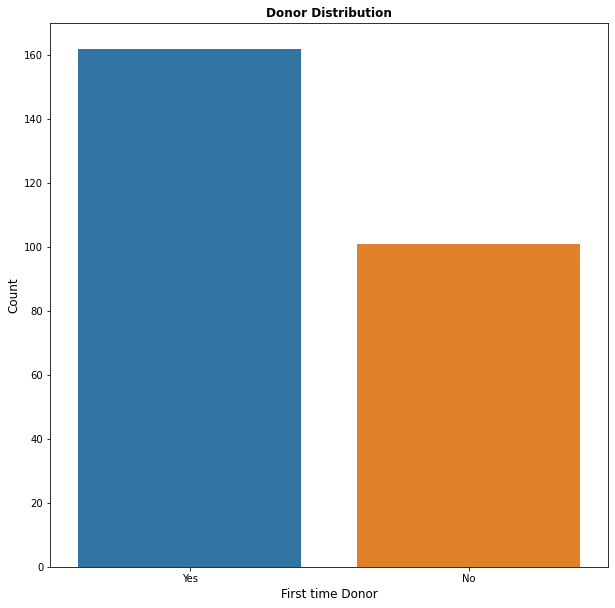

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='New Donor?', data = df)
plt.title('Donor Distribution', weight='bold')
plt.xlabel('First time Donor', fontsize=12)
plt.ylabel('Count', fontsize=12)

<AxesSubplot:xlabel='New Donor?', ylabel='Intended Donation'>

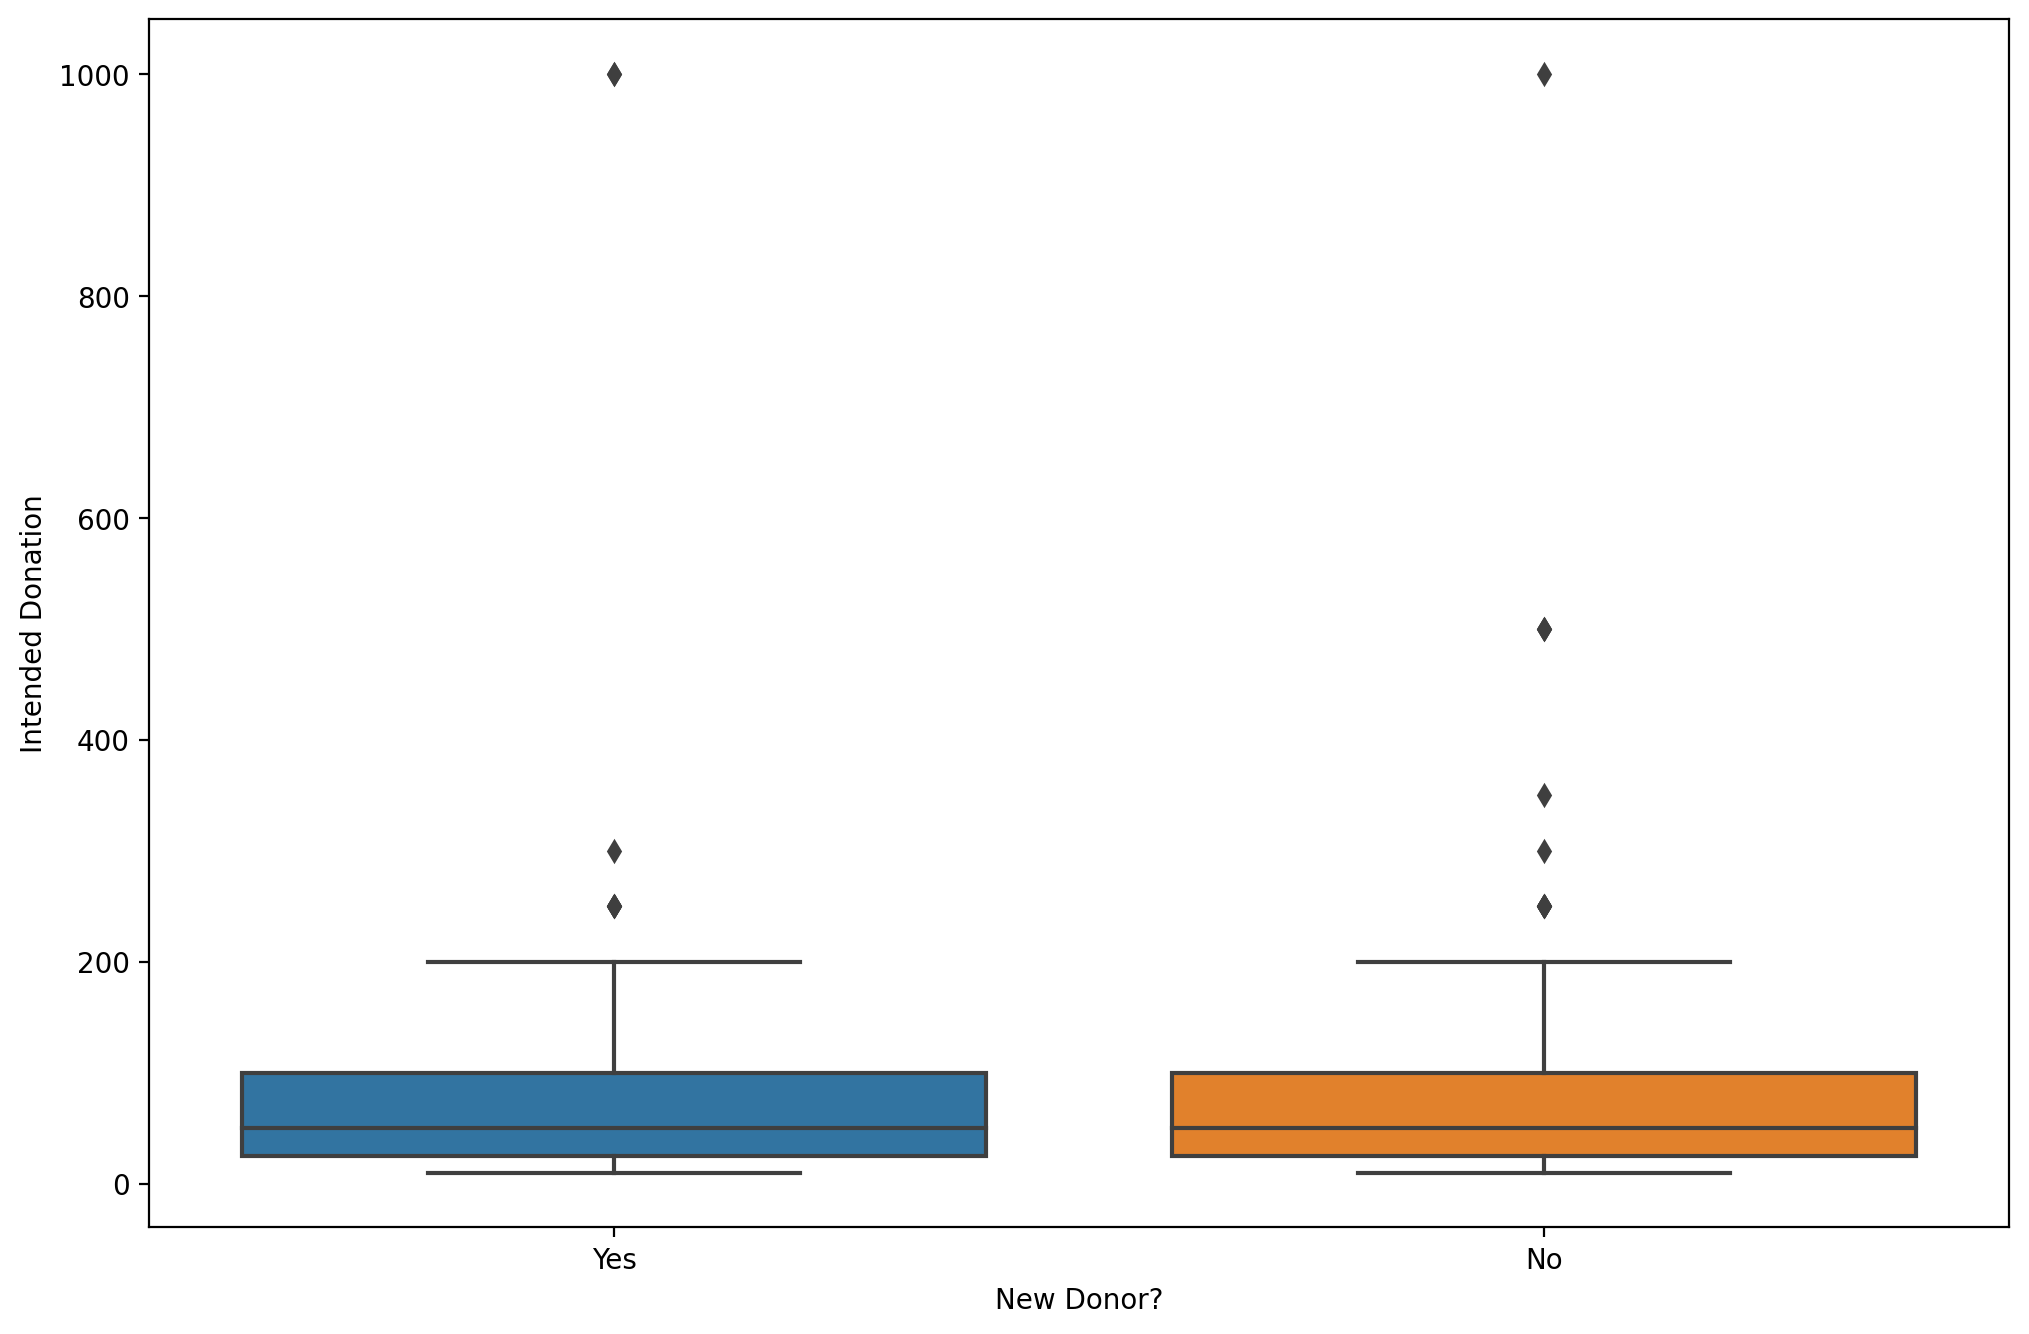

In [23]:
plt.figure(figsize=(12,8), dpi=200)
sns.boxplot(x='New Donor?', y='Intended Donation', data=df)

Text(0, 0.5, 'Count')

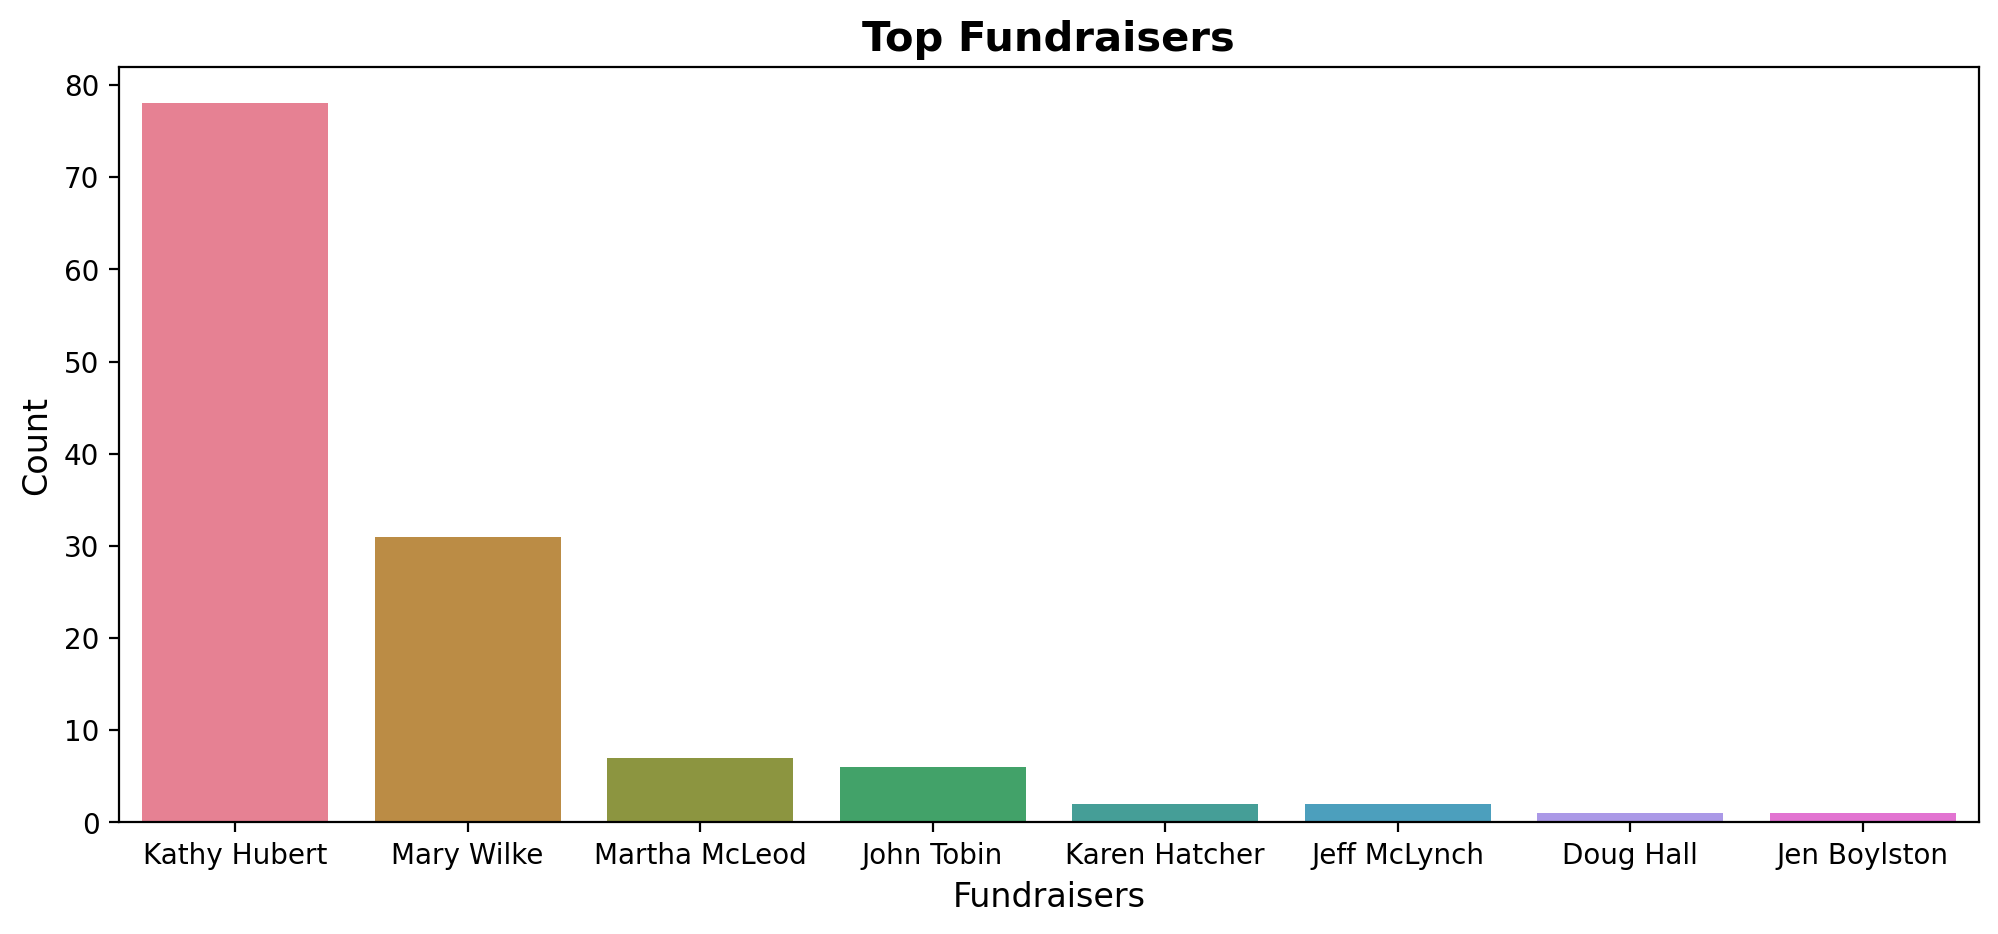

In [82]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x='Fundraiser', data = df,order= pd.value_counts(df['Fundraiser']).iloc[:10].index, palette='husl')
plt.title('Top Fundraisers', weight='bold', fontsize=15)
plt.xlabel('Fundraisers', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Fundraisers vs Intended Donation for NHSFFP')

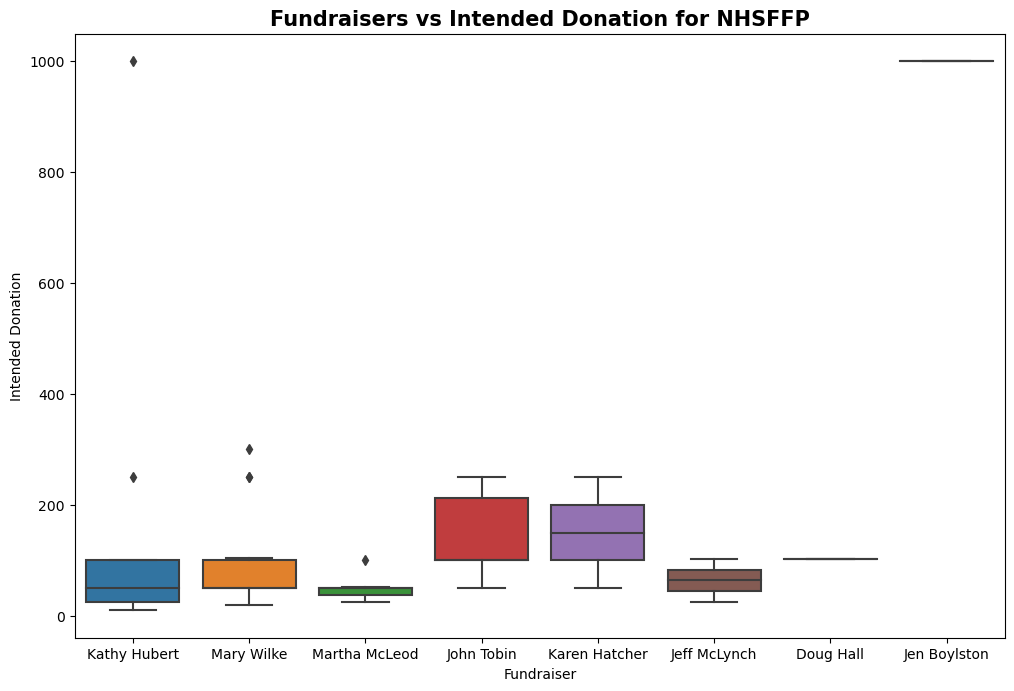

In [86]:
plt.figure(figsize=(12,8), dpi=100)
sns.boxplot(x='Fundraiser', y='Intended Donation',order= pd.value_counts(df['Fundraiser']).iloc[:10].index, data=df)
plt.title('Fundraisers vs Intended Donation for NHSFFP', weight='bold', fontsize=15)

Text(0.5, 1.0, 'States vs Intended Donation for NHSFFP')

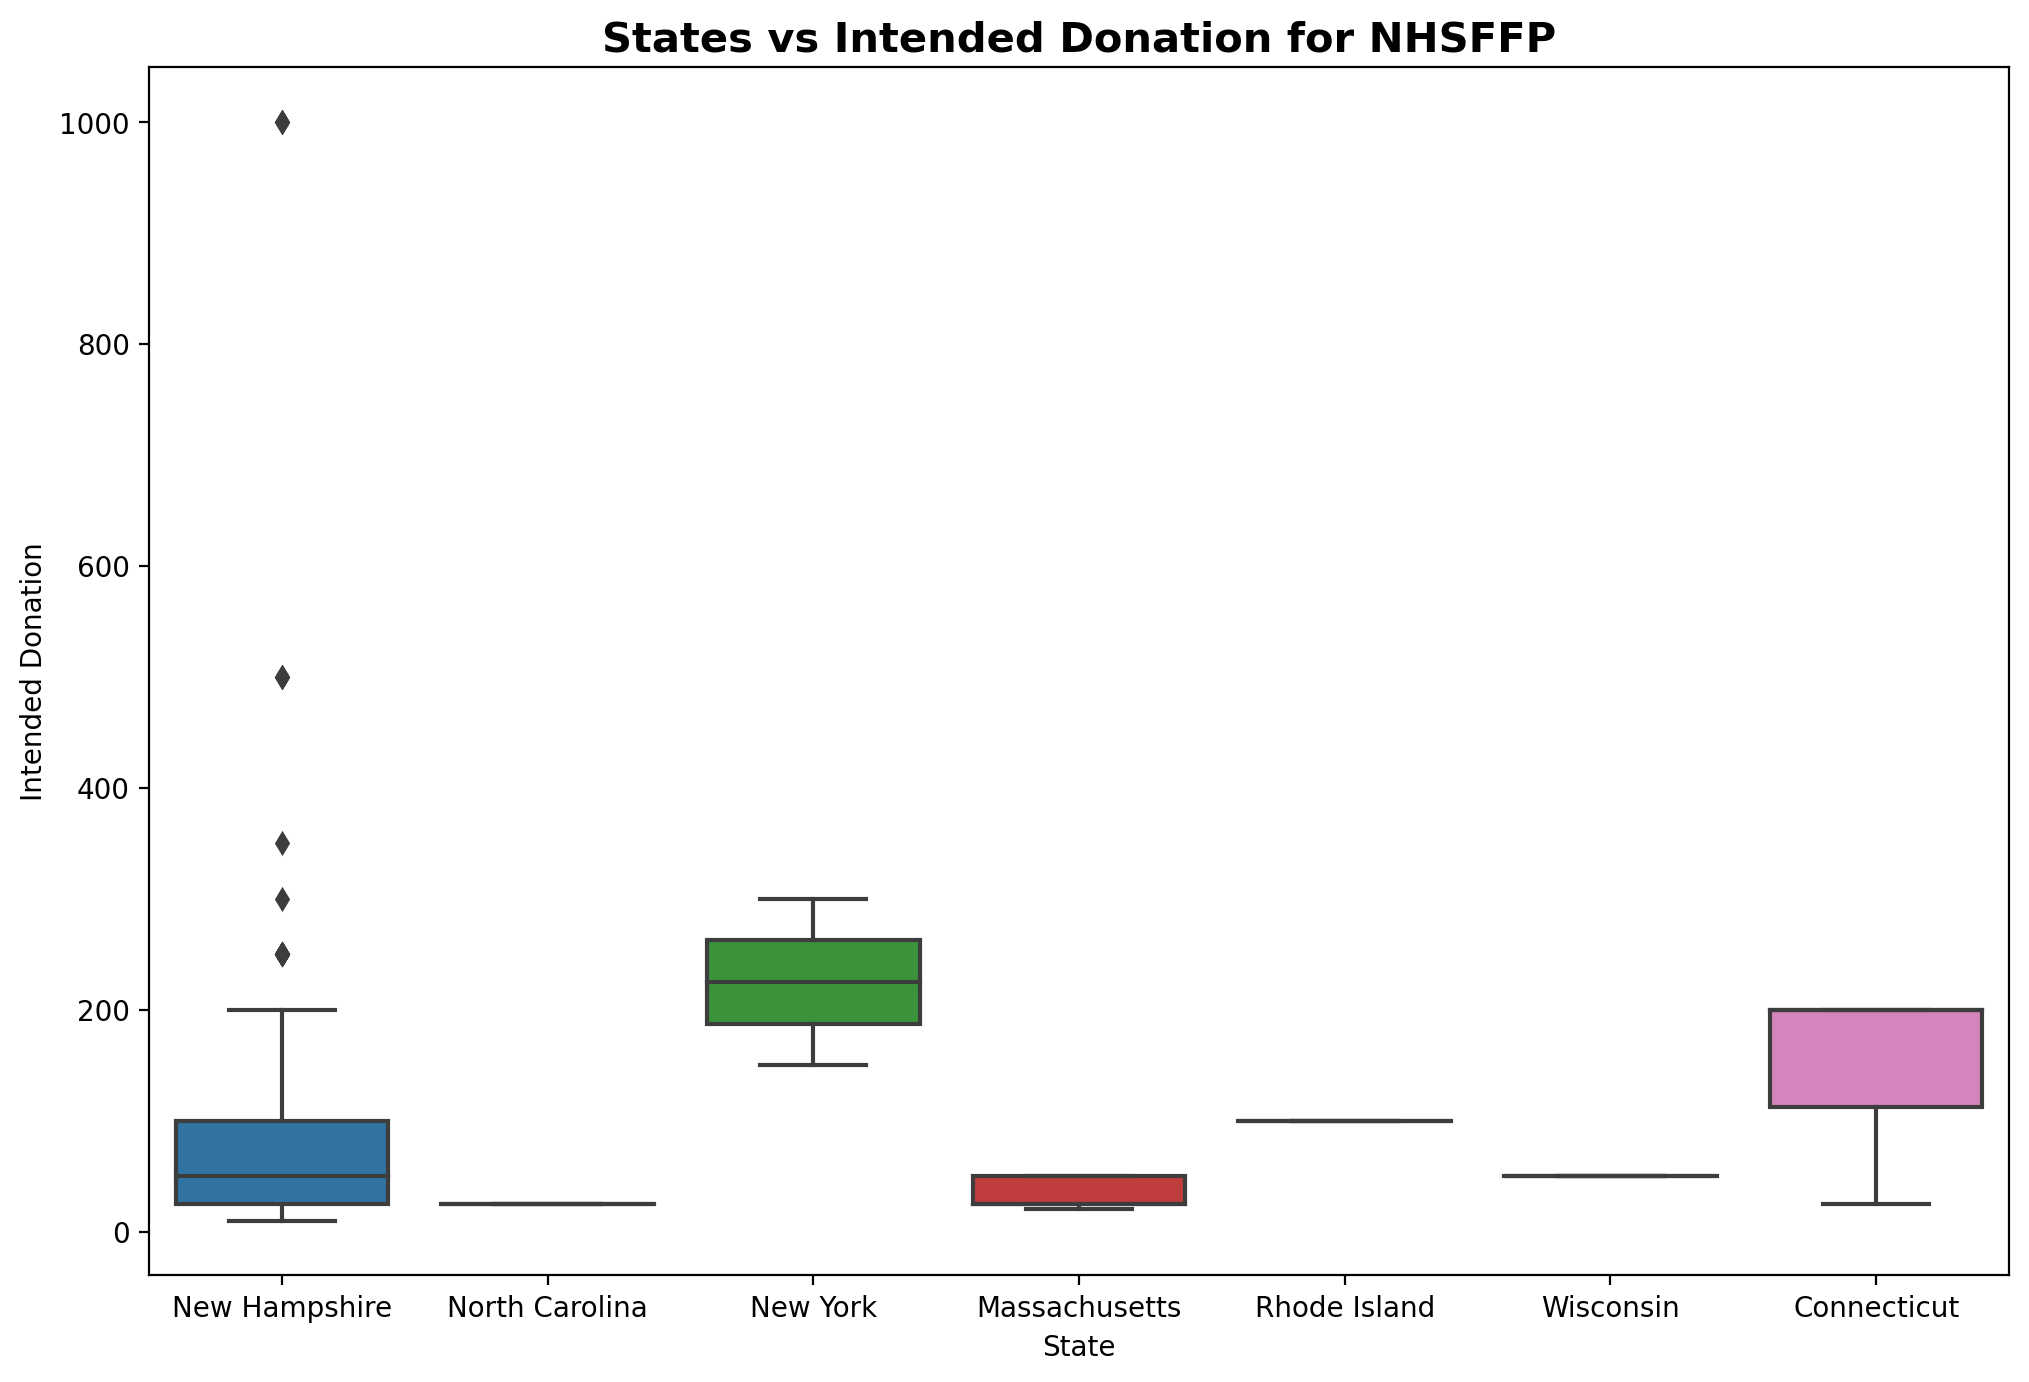

In [78]:
plt.figure(figsize=(12,8), dpi=200)
sns.boxplot(x='State', y='Intended Donation', data=df)
plt.title('States vs Intended Donation for NHSFFP', weight='bold', fontsize=15)

In [79]:
pd.value_counts(df['State']).iloc[:]

New Hampshire     249
Massachusetts       5
Connecticut         3
North Carolina      2
New York            2
Wisconsin           1
Rhode Island        1
Name: State, dtype: int64

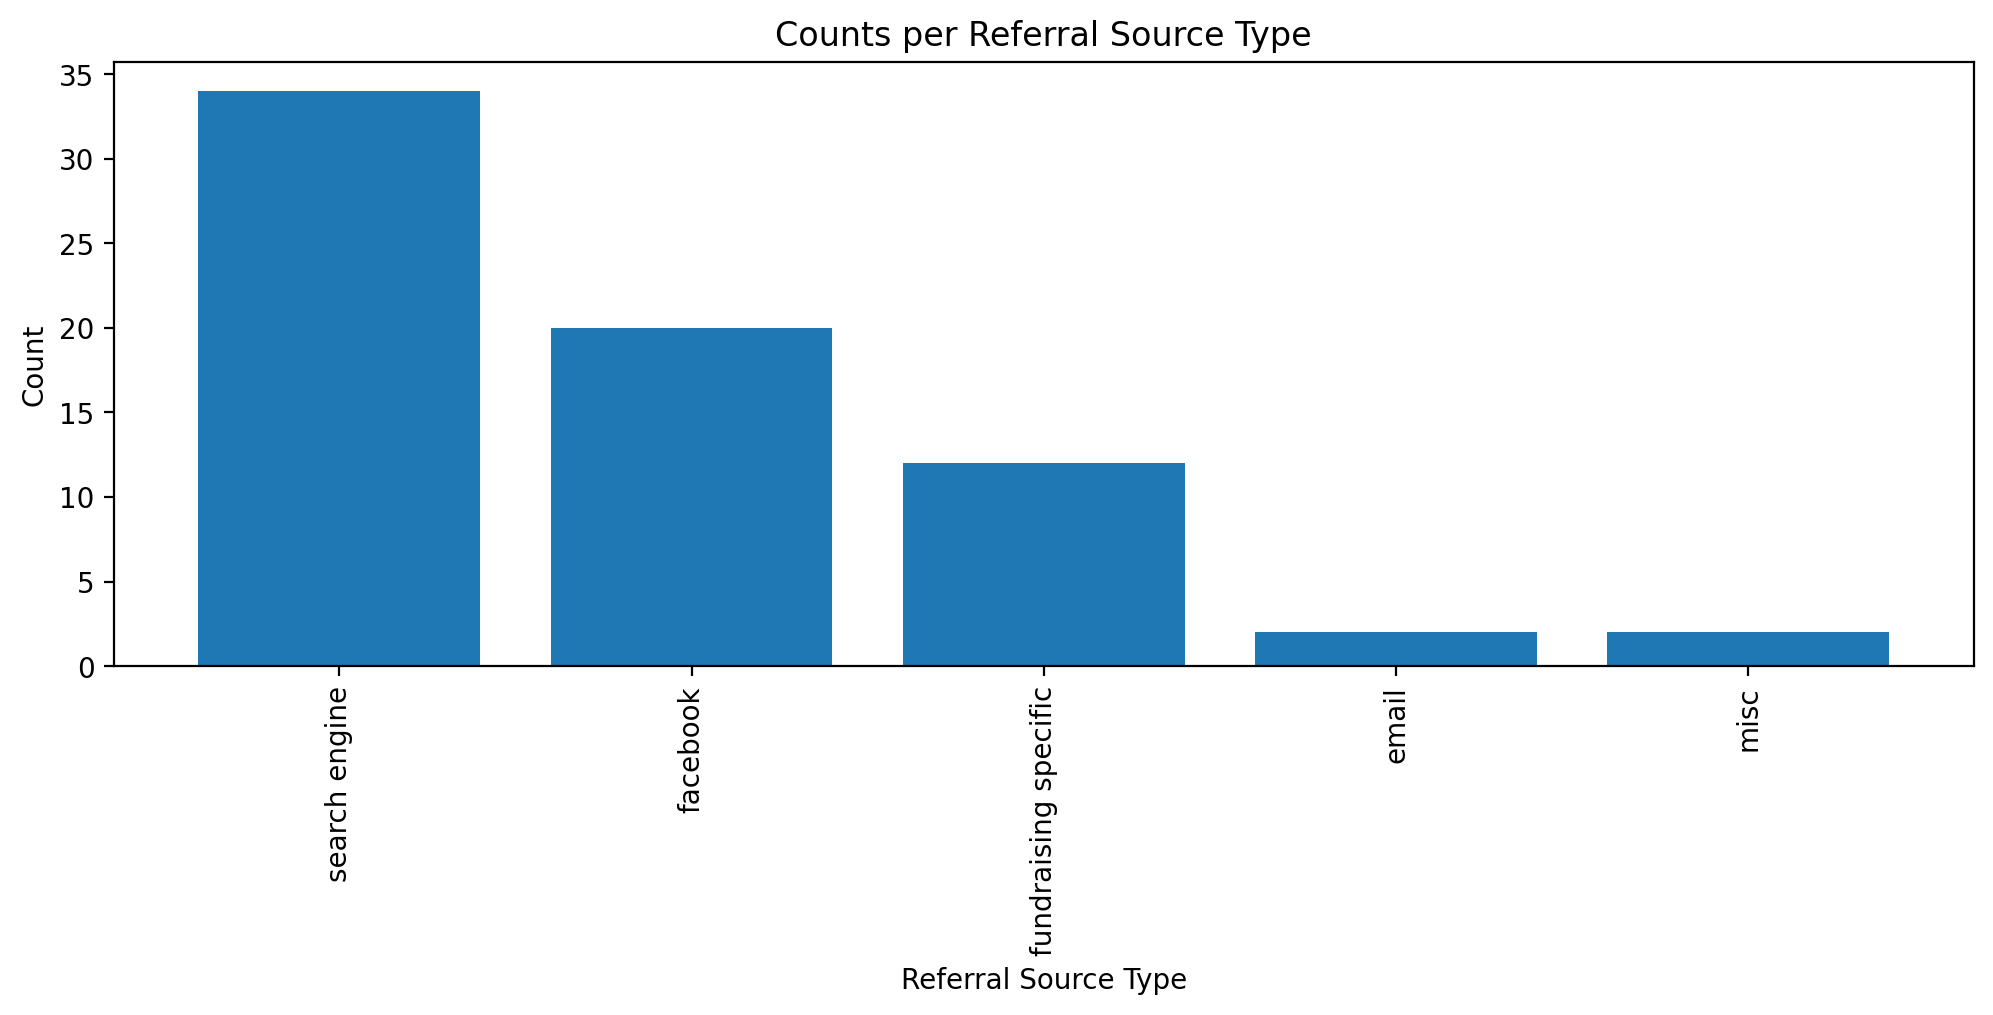

In [28]:
referral = df['Referral Source']
referral.describe()
count = 23 + 6 + 2 + 2 + 1 + 1 + 1 + 9 + 9 + 1 + 1 + 6 + 3 + 1 + 1 + 1
fb = 9 + 9 + 1 + 1
email = 1+1
search = 23 + 6 + 2 + 2 + 1
fund = 6 + 3 + 1 + 1 + 1 #
misc = 70 - count
data = pd.Series([search,fb,fund,email,misc], index = ['search engine', 'facebook', 'fundraising specific',  'email','misc'])
data
plt.figure(figsize=(12,4),dpi=200)
xaxis = data.iloc[:].index
yaxis = data.iloc[:]
yaxis
plt.bar(xaxis, yaxis)
plt.xlabel('Referral Source Type')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Counts per Referral Source Type')
plt.show()

In [29]:
pd.value_counts(df['Referral Source']).iloc[:]


www.google.com              23
l.facebook.com               9
m.facebook.com               9
fairfundingnh.org            6
com.google.android.gm        6
www.givegab.com              3
www.bing.com                 2
search.yahoo.com             2
duckduckgo.com               1
www.facebook.com             1
go.cityyear.org              1
nhgives.org                  1
blackheritagetrailnh.org     1
hs_email                     1
facebook                     1
link.zixcentral.com          1
mail.google.com              1
www.nhnonprofits.org         1
Name: Referral Source, dtype: int64

<Figure size 1600x4000 with 0 Axes>

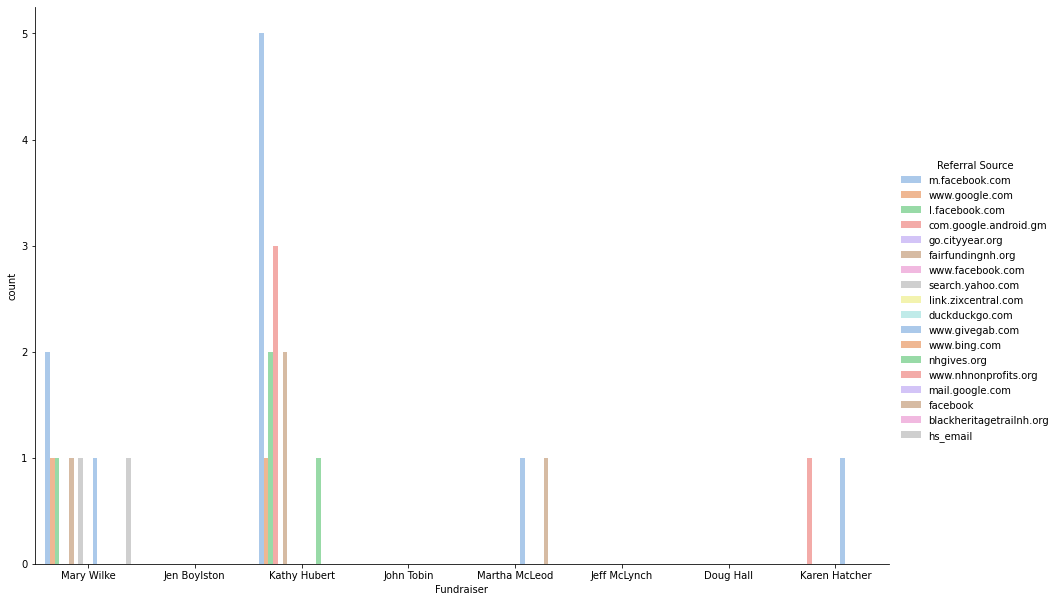

In [72]:
plt.figure(figsize=(8,20), dpi=200)
sns.catplot(x='Fundraiser', hue="Referral Source",palette="pastel", kind="count",height=8.27, aspect=15/,data=df)

Text(0, 0.5, 'Count')

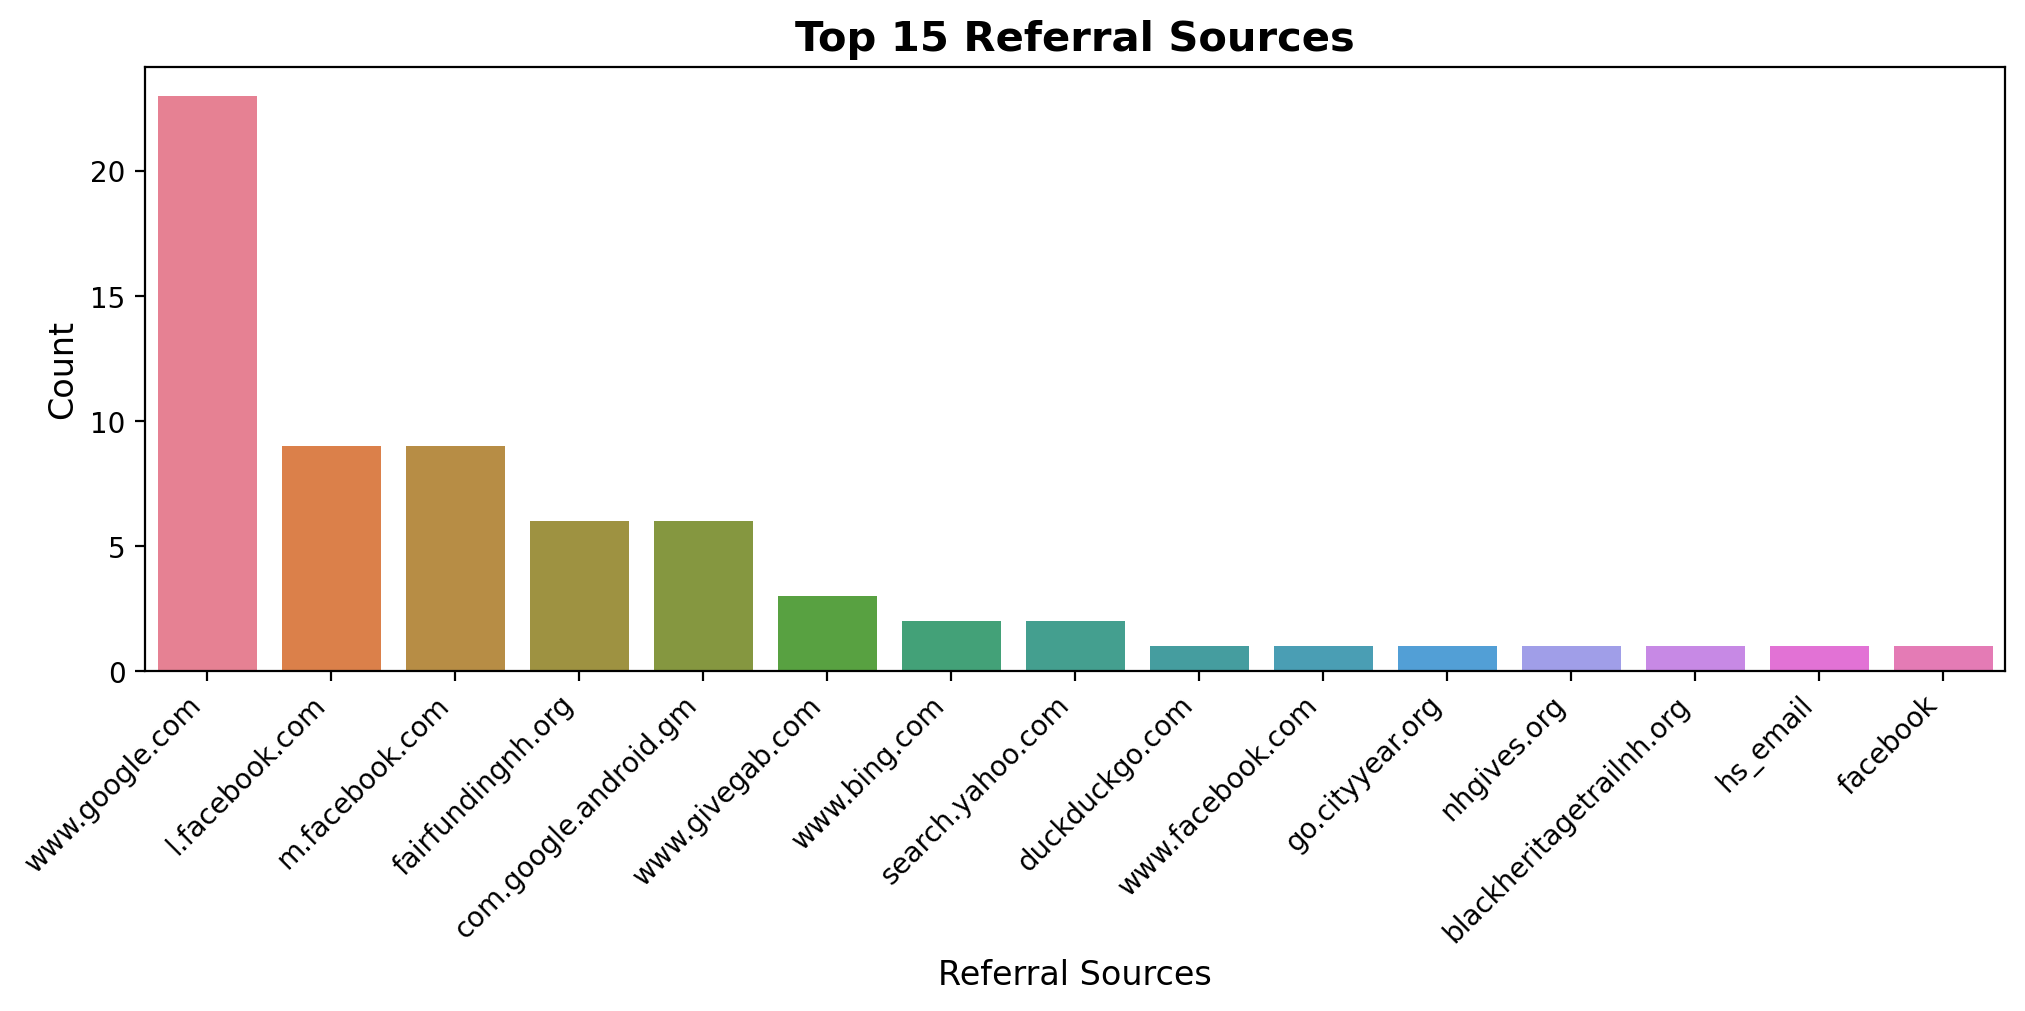

In [77]:
plt.figure(figsize=(12,4), dpi=200)
sns.countplot(x='Referral Source', data = df,order= pd.value_counts(df['Referral Source']).iloc[:15].index, palette='husl')
plt.title('Top 15 Referral Sources', weight='bold', fontsize=15)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Referral Sources', fontsize=12)
plt.ylabel('Count', fontsize=12)